In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading data
res_df = pd.read_csv(r'C:\Users\tfanl\Downloads\restaurants.csv')
rev_df = pd.read_csv(r'C:\Users\tfanl\Downloads\reviews.csv')

#change review date to date and year format
rev_df['date'] = pd.to_datetime(rev_df['date'])
rev_df['year'] = rev_df['date'].dt.year




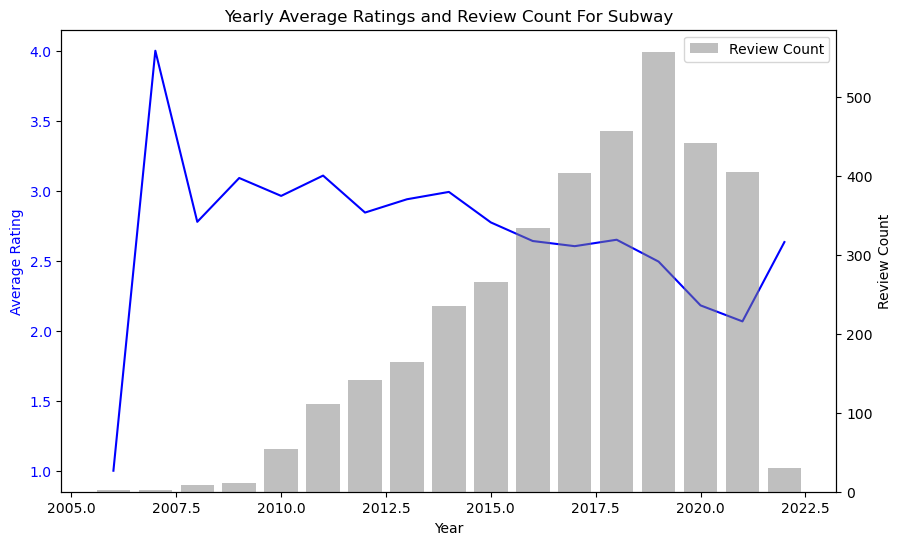

In [8]:
# Filter out Subway stores
subway = res_df[res_df['name'].str.contains('Subway',case=False,na=False)]

# Get Subway review data
subway_rev = rev_df[rev_df['business_id'].isin(subway['business_id'])]

#Group by year to calculate average ratings and number of reviews per year
year_dt = subway_rev.groupby('year').agg(
    avg_star = ('stars', 'mean'),
    review_count = ('review_id','count')
).reset_index()

fig,ax1 = plt.subplots(figsize=(10,6))

# Create the plot
ax1.plot(year_dt['year'], year_dt['avg_star'],label='Average Rating',color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Rating',color='blue')
ax1.tick_params(axis='y',labelcolor='blue')

ax2 = ax1.twinx()
ax2.bar(year_dt['year'], year_dt['review_count'],alpha=0.5,label='Review Count', color='gray')
ax2.set_ylabel('Review Count',color='black')
ax2.tick_params(axis='y',labelcolor='black')

plt.title('Yearly Average Ratings and Review Count For Subway')
plt.legend();

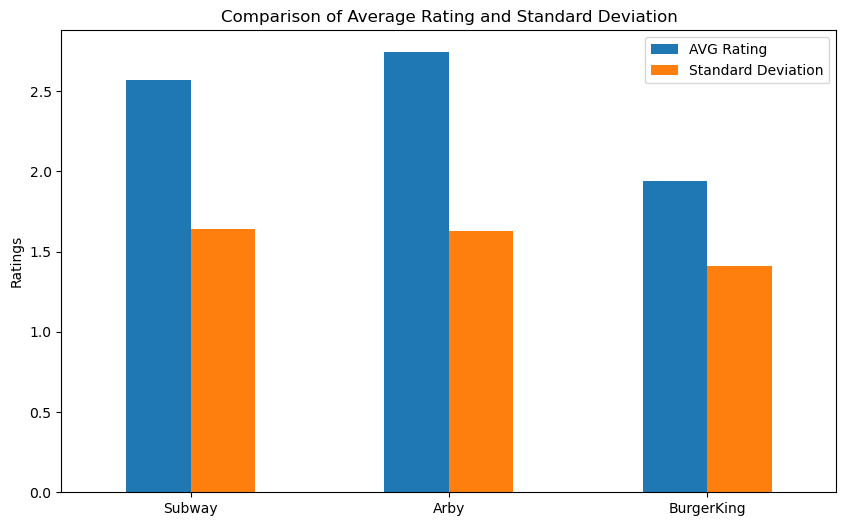

In [6]:
# Filter restaurants that contain "Subway" or competitors' names
Subway = res_df[res_df['name'].str.contains('Subway', case=False, na=False)]['business_id']
Arby = res_df[res_df['name'].str.contains('Arby\'s', case=False, na=False)]['business_id']
Burgerking = res_df[res_df['name'].str.contains('Burger King', case=False, na=False)]['business_id']

sub_rev = rev_df[rev_df['business_id'].isin(Subway)]
Arby_rev = rev_df[rev_df['business_id'].isin(Arby)]
Burger_rev = rev_df[rev_df['business_id'].isin(Burgerking)]

# Calculate mean and standard deviation by restaurant
cal_mean_std = {
    "Subway":{"mean":sub_rev['stars'].mean(), "std":sub_rev['stars'].std()},
    "Arby":{"mean":Arby_rev['stars'].mean(), "std":Arby_rev['stars'].std()},
    "BurgerKing":{"mean":Burger_rev['stars'].mean(), "std":Burger_rev['stars'].std()}
}

# Create a dataframe
cal_mean_std_dt = pd.DataFrame(cal_mean_std).T
cal_mean_std_dt = cal_mean_std_dt.rename(columns={"mean": "AVG Rating", "std":"Standard Deviation"})

# Create the plot
cal_mean_std_dt.plot(kind='bar', figsize=(10,6))
plt.title('Comparison of Average Rating and Standard Deviation')
plt.ylabel('Ratings')
plt.xticks(rotation=0);


Medium chains count: 1


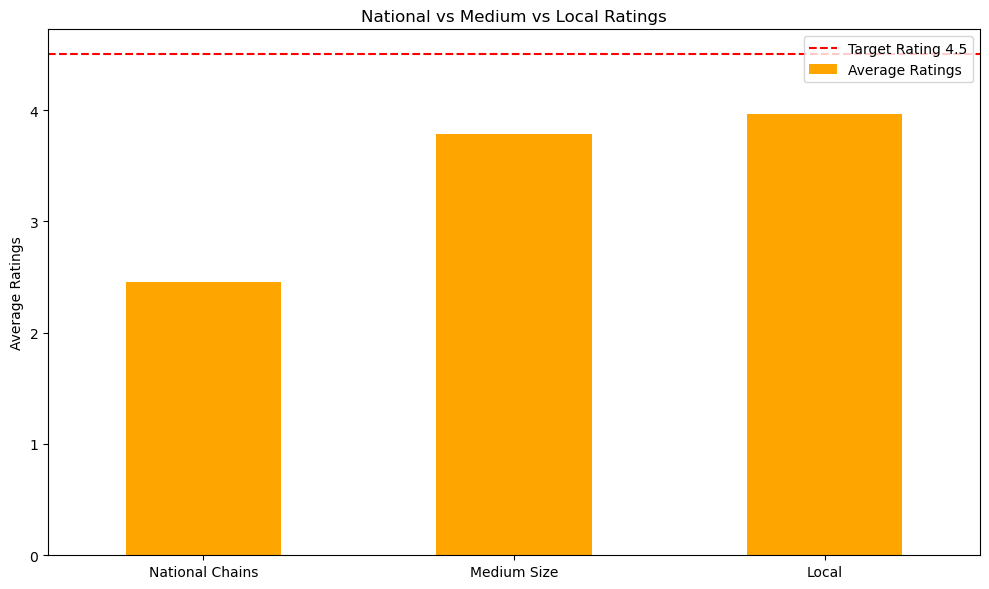

In [27]:
# Ensure consistent restaurant names
res_df['name'] = res_df['name'].str.strip().str.lower()

# Group by restaurant name and count the number of unique cities
res_count = res_df.groupby('name')['city'].nunique()

# Define national, medium, and local chains
national = res_count[res_count > 50].index
medium = res_count[(res_count > 1) & (res_count <= 50)].index
local = res_count[res_count == 1].index

# Check if medium size exists
print(f"Medium chains count: {len(medium)}")

# Filter reviews for national, medium, and local chains
national_res = res_df[res_df['name'].isin(national)]['business_id']
medium_res = res_df[res_df['name'].isin(medium)]['business_id']
local_res = res_df[res_df['name'].isin(local)]['business_id']

national_rev = rev_df[rev_df['business_id'].isin(national_res)]
medium_rev = rev_df[rev_df['business_id'].isin(medium_res)]
local_rev = rev_df[rev_df['business_id'].isin(local_res)]

# Calculate average ratings
calculation_nml = {
    "National Chains": {"Average Ratings": national_rev['stars'].mean()},
    "Medium Size": {"Average Ratings": medium_rev['stars'].mean()},
    "Local": {"Average Ratings": local_rev['stars'].mean()},
}

# Plot the results
calculation_nml_df = pd.DataFrame(calculation_nml).T
calculation_nml_df['Average Ratings'].plot(kind='bar', figsize=(10, 6), color=['orange'])
plt.title('National vs Medium vs Local Ratings')
plt.ylabel('Average Ratings')
plt.xticks(rotation=0)
plt.axhline(4.5, color='red', linestyle='--', label="Target Rating 4.5")
plt.legend()
plt.tight_layout();

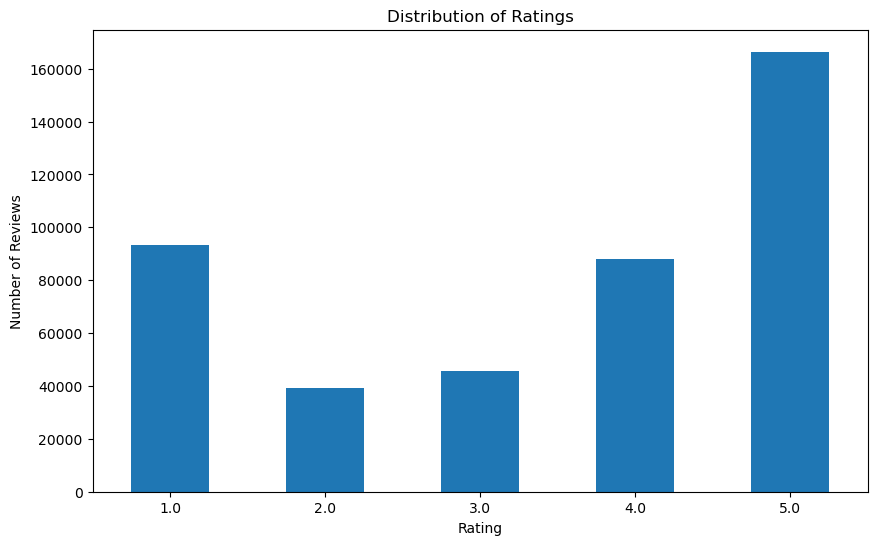

In [29]:
ratings_count = rev_df.groupby('stars').size()

plt.figure(figsize=(10,6))
ratings_count.plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0);


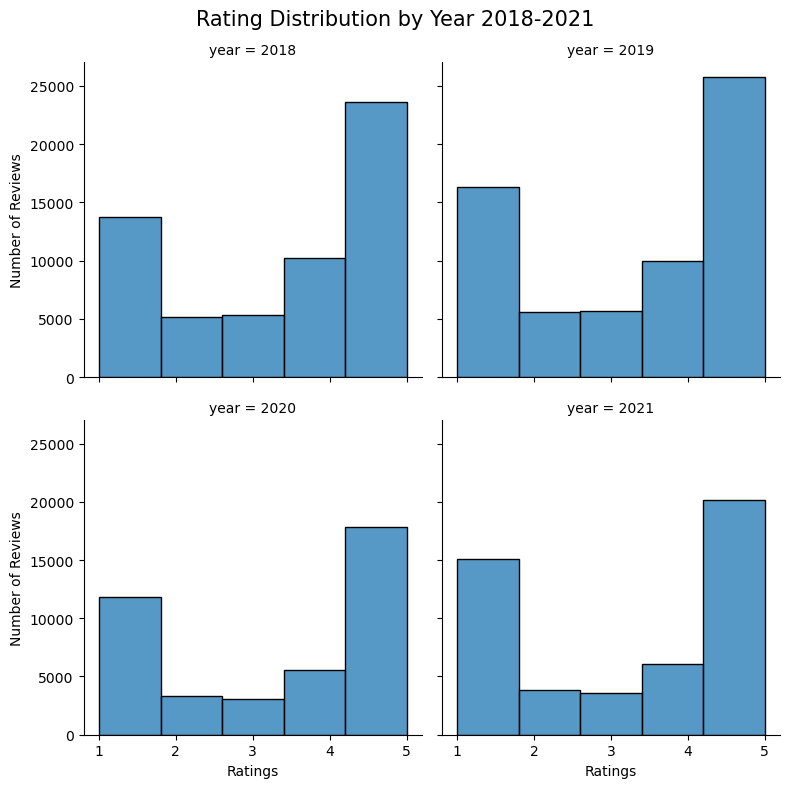

In [33]:
filtered_years = rev_df[(rev_df['year'] >= 2018) & (rev_df['year'] <= 2021)]

chart = sns.FacetGrid(filtered_years, col="year", col_wrap=2, height=4, sharex=True, sharey=True)
chart.map(sns.histplot, "stars", bins=5, kde=False)
chart.fig.suptitle("Rating Distribution by Year 2018-2021", fontsize=15)
chart.set_axis_labels("Ratings", "Number of Reviews")
chart.tight_layout();

States in High category:
Empty DataFrame
Columns: [state, state_avg, state_rev_count]
Index: []


States in Medium category:
  state  state_avg  state_rev_count
1    AZ   3.010331              484


States in Low category:
   state  state_avg  state_rev_count
0     AB   2.741176               85
2     CA   2.400000               90
3     DE   1.000000                5
4     FL   2.502326              645
5     ID   2.326087               92
6     IL   2.188119              101
7     IN   2.674365              433
8     LA   2.225225              333
9     MO   2.392377              446
10    NJ   2.100000               10
11    NV   2.747253              364
12    PA   2.734884              215
13    TN   2.418750              320




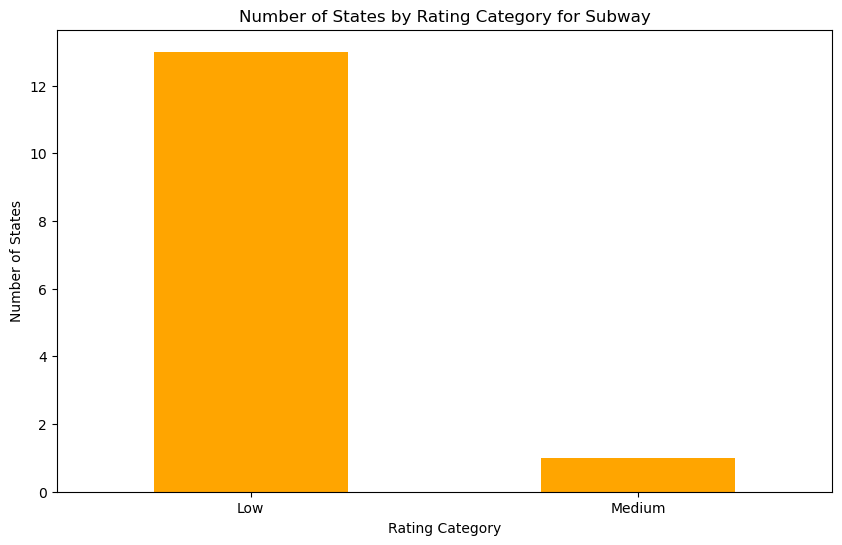

In [ ]:
# Calculate average ratings and number of comments by state
subway_rev_full = subway_rev.merge(subway[['business_id', 'state']], on='business_id', how='left')
state_avg_ratings = subway_rev_full.groupby('state').agg(
    state_avg = ('stars', 'mean'),
    state_rev_count = ('review_id', 'count')
).reset_index()

# Define the rating classification function
def classify_state_rating(stars):
    if stars >= 4.0:
        return 'High'
    elif stars >= 3.0:
        return 'Medium'
    else:
        return 'Low'

# Add a rating category column    
state_avg_ratings['rating_category'] = state_avg_ratings['state_avg'].apply(classify_state_rating)

# Number of states by rating category
state_rating_count = state_avg_ratings['rating_category'].value_counts()

plt.figure(figsize=(10,6))
state_rating_count.plot(kind='bar', color=['orange'])
plt.title('Number of States by Rating Category for Subway')
plt.xlabel('Rating Category')
plt.ylabel('Number of States')
plt.xticks(rotation=0)

# Print details for each category
for category in ['High', 'Medium', 'Low']:
    state_in_category = state_avg_ratings[state_avg_ratings['rating_category'] == category]
    print(f"States in {category} category:")
    print(state_in_category[['state','state_avg','state_rev_count']])
    print("\n")
